In [95]:
import numpy as np
import matplotlib.pyplot as plt

In [140]:
M = 1000
N = 20
x = np.linspace(0, 1, N)
u = np.ones(N)
dt = 1.0 / M
dx = 1.0 / N
D = 1.0
alpha = D * dt / dx**2

In [141]:
g0 = 1.0
gN = 0.0
for itime in range(M):
    u_new = np.zeros(N)
    for i in range(1, N - 1):
        u_new[i] = u[i] + alpha * (u[i + 1] - 2 * u[i] + u[i - 1])
    u_new[0] = u[1] - g0 * dx
    u_new[N - 1] = u[N - 2] + gN * dx
    # u_new[0] = 0
    # u_new[N - 1] = 1
    u = u_new

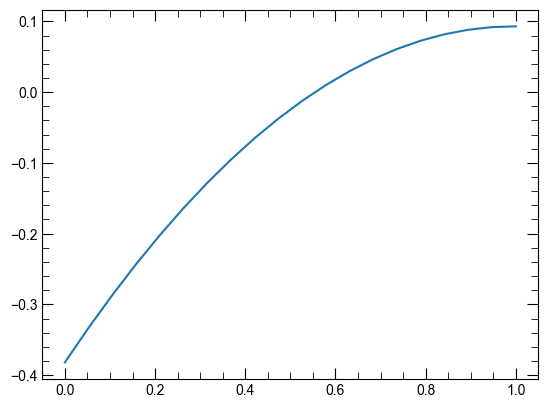

In [142]:
fig, ax = plt.subplots()
ax.plot(x, u)

In [143]:
Nx = 20
Nt = 20
D = 1.0
x = np.linspace(0, 1, Nx)
t = np.linspace(0, 1, Nt)
dx = x[1] - x[0]
dt = t[1] - t[0]
g0 = 1.0
gN = 0.0
alpha = -D * dt / (2 * dx**2)
A = np.zeros((Nx, Nx))
B = np.zeros((Nx, Nx))
# u = np.zeros(Nx)
# u[int(Nx / 4) : int(3 * Nx / 4)] = 1
u = np.ones(Nx)
for i in range(1, Nx - 1):
    A[i, i - 1] = alpha
    A[i, i] = 1 - 2 * alpha
    A[i, i + 1] = alpha
    B[i, i - 1] = -alpha
    B[i, i] = 1 + 2 * alpha
    B[i, i + 1] = -alpha
A[0, 0] = A[-1, -1] = 1
B[0, 0] = B[-1, -1] = 1
for itime in range(Nt):
    u_new[0] = u[1] - g0 * dx
    u_new[N - 1] = u[N - 2] + gN * dx
    u_new = np.linalg.solve(A, np.dot(B, u))
    u = u_new

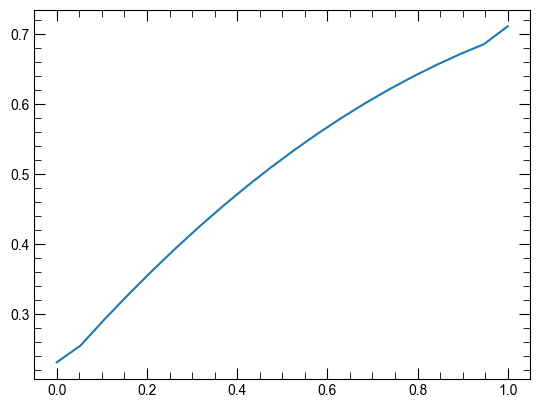

In [144]:
fig, ax = plt.subplots()
ax.plot(x, u)